In [9]:
from LRGradientDescent import LogisticRegressionGradientDescent as LRGD
from LRGradientDescentWithFeatureTransform import LRGDWithFeatureTransform as LRGDF
from show_images import show_images
import numpy as np
from scipy.special import logsumexp
from scipy.special import expit as sigm #sigmoid function
from numpy import genfromtxt
from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from scipy.special import expit as sigm
from numpy.random import randint

In [10]:
x= genfromtxt('data_sneaker_vs_sandal/x_train.csv', delimiter=',')[1:]
#xbias_NG = lr.insert_final_col_of_all_ones(x_all)
y= genfromtxt('data_sneaker_vs_sandal/y_train.csv', delimiter=',')[1:]

In [11]:
print(x.shape, y.shape)

(12000, 784) (12000,)


In [12]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    FP_id=[]
    FN_id=[]
    l=ytrue_N.size
    for i in range(0,l):
        if (yhat_N[i]==1):
            if (ytrue_N[i]==1):
                TP=TP+1.0
            else:
                FP=FP+1.0
                #FP_id.append(i)
        else:
            if (ytrue_N[i]==0):
                TN=TN+1.0
            else:
                FN=FN+1.0
                #FN_id.append(i)      
    return TP, TN, FP, FN #, FP_id, FN_id

In [13]:
def make_noise(x,y):
    N=int(x[0,:].size)
    #print(N)
    x_all=x;
    y_all=y;
    x_on=0;
    for j in range(9):
        x_j=x
        for i in range(y.size):
            for k in range(randint(1,10)):
                pos=randint(0,N)
                x_j[i, pos]=1-x[i,pos]
        x_all=np.concatenate((x_all, x_j), axis=0)
        y_all=np.concatenate((y_all, y), axis=0)
        #print(x_all.shape)
    return x_all, y_all

In [14]:
x_n, y_n=make_noise(x,y)

In [15]:
print(x_n.shape, np.matrix(y_n).shape)
#all_D=np.column_stack((x_n, np.matrix(y_n)))

(120000, 784) (1, 120000)


In [16]:
# Reshuffle:
Data=np.concatenate((x_n, np.matrix(y_n).T), axis=1)
np.random.shuffle(Data)
x_n=Data[:,:-1]
y_n=np.asarray(Data[:,-1]).reshape(-1)

In [17]:
va_rate=0.3
x_va=x_n[:int(np.ceil(va_rate*y_n.shape[0])),]
y_va=y_n[:int(np.ceil(va_rate*y_n.shape[0]))]
x_te=x_n[int(np.ceil(va_rate*y_n.shape[0])):,]
y_te=y_n[int(np.ceil(va_rate*y_n.shape[0])):]

In [18]:
#Check
print (x_te.shape, y_te.shape)
print(y_n.shape)

(84000, 784) (84000,)
(120000,)


In [20]:
## Run LR on original features!
orig_lr = LRGD(alpha=10.0, step_size=0.1)
orig_lr.fit(x_te, y_te)

Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.030265  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.911808  avg_L1_norm_grad         0.028655  w[0]   -0.000 bias   -0.000
iter    2/1000000  loss         0.848053  avg_L1_norm_grad         0.019671  w[0]    0.000 bias    0.021
iter    3/1000000  loss         0.804067  avg_L1_norm_grad         0.018522  w[0]    0.000 bias    0.025
iter    4/1000000  loss         0.770729  avg_L1_norm_grad         0.013981  w[0]    0.001 bias    0.040
iter    5/1000000  loss         0.745030  avg_L1_norm_grad         0.013394  w[0]    0.001 bias    0.047
iter    6/1000000  loss         0.724020  avg_L1_norm_grad         0.011403  w[0]    0.001 bias    0.059
iter    7/1000000  loss         0.706203  avg_L1_norm_grad         0.010936  w[0]    0.001 bias    0.067
iter    8/1000000  loss         0.6905

iter 2901/1000000  loss         0.185389  avg_L1_norm_grad         0.000203  w[0]   -0.019 bias    2.633
iter 3000/1000000  loss         0.184782  avg_L1_norm_grad         0.000198  w[0]   -0.019 bias    2.656
iter 3001/1000000  loss         0.184776  avg_L1_norm_grad         0.000197  w[0]   -0.019 bias    2.657
iter 3100/1000000  loss         0.184203  avg_L1_norm_grad         0.000192  w[0]   -0.019 bias    2.679
iter 3101/1000000  loss         0.184198  avg_L1_norm_grad         0.000192  w[0]   -0.019 bias    2.679
iter 3200/1000000  loss         0.183656  avg_L1_norm_grad         0.000188  w[0]   -0.019 bias    2.701
iter 3201/1000000  loss         0.183650  avg_L1_norm_grad         0.000188  w[0]   -0.019 bias    2.701
iter 3300/1000000  loss         0.183137  avg_L1_norm_grad         0.000183  w[0]   -0.018 bias    2.722
iter 3301/1000000  loss         0.183132  avg_L1_norm_grad         0.000183  w[0]   -0.018 bias    2.722
iter 3400/1000000  loss         0.182645  avg_L1_norm_g

iter 6900/1000000  loss         0.173979  avg_L1_norm_grad         0.000095  w[0]   -0.007 bias    3.176
iter 6901/1000000  loss         0.173977  avg_L1_norm_grad         0.000095  w[0]   -0.007 bias    3.176
iter 7000/1000000  loss         0.173858  avg_L1_norm_grad         0.000093  w[0]   -0.007 bias    3.184
iter 7001/1000000  loss         0.173857  avg_L1_norm_grad         0.000093  w[0]   -0.007 bias    3.184
iter 7100/1000000  loss         0.173740  avg_L1_norm_grad         0.000092  w[0]   -0.006 bias    3.192
iter 7101/1000000  loss         0.173739  avg_L1_norm_grad         0.000092  w[0]   -0.006 bias    3.192
iter 7200/1000000  loss         0.173627  avg_L1_norm_grad         0.000091  w[0]   -0.006 bias    3.199
iter 7201/1000000  loss         0.173625  avg_L1_norm_grad         0.000091  w[0]   -0.006 bias    3.199
iter 7300/1000000  loss         0.173516  avg_L1_norm_grad         0.000089  w[0]   -0.005 bias    3.206
iter 7301/1000000  loss         0.173515  avg_L1_norm_g

iter 10800/1000000  loss         0.171093  avg_L1_norm_grad         0.000056  w[0]    0.006 bias    3.391
iter 10801/1000000  loss         0.171092  avg_L1_norm_grad         0.000056  w[0]    0.006 bias    3.391
iter 10900/1000000  loss         0.171051  avg_L1_norm_grad         0.000056  w[0]    0.006 bias    3.395
iter 10901/1000000  loss         0.171051  avg_L1_norm_grad         0.000056  w[0]    0.006 bias    3.395
iter 11000/1000000  loss         0.171010  avg_L1_norm_grad         0.000055  w[0]    0.006 bias    3.399
iter 11001/1000000  loss         0.171010  avg_L1_norm_grad         0.000055  w[0]    0.006 bias    3.399
iter 11100/1000000  loss         0.170970  avg_L1_norm_grad         0.000054  w[0]    0.006 bias    3.402
iter 11101/1000000  loss         0.170970  avg_L1_norm_grad         0.000054  w[0]    0.006 bias    3.402
iter 11200/1000000  loss         0.170932  avg_L1_norm_grad         0.000054  w[0]    0.007 bias    3.406
iter 11201/1000000  loss         0.170931  avg

iter 14700/1000000  loss         0.170011  avg_L1_norm_grad         0.000036  w[0]    0.013 bias    3.507
iter 14701/1000000  loss         0.170011  avg_L1_norm_grad         0.000036  w[0]    0.013 bias    3.507
iter 14800/1000000  loss         0.169994  avg_L1_norm_grad         0.000036  w[0]    0.014 bias    3.509
iter 14801/1000000  loss         0.169994  avg_L1_norm_grad         0.000036  w[0]    0.014 bias    3.509
iter 14900/1000000  loss         0.169977  avg_L1_norm_grad         0.000035  w[0]    0.014 bias    3.512
iter 14901/1000000  loss         0.169977  avg_L1_norm_grad         0.000035  w[0]    0.014 bias    3.512
iter 15000/1000000  loss         0.169961  avg_L1_norm_grad         0.000035  w[0]    0.014 bias    3.514
iter 15001/1000000  loss         0.169961  avg_L1_norm_grad         0.000035  w[0]    0.014 bias    3.514
iter 15100/1000000  loss         0.169945  avg_L1_norm_grad         0.000035  w[0]    0.014 bias    3.516
iter 15101/1000000  loss         0.169945  avg

iter 18600/1000000  loss         0.169549  avg_L1_norm_grad         0.000024  w[0]    0.018 bias    3.578
iter 18601/1000000  loss         0.169549  avg_L1_norm_grad         0.000024  w[0]    0.018 bias    3.578
iter 18700/1000000  loss         0.169541  avg_L1_norm_grad         0.000024  w[0]    0.018 bias    3.579
iter 18701/1000000  loss         0.169541  avg_L1_norm_grad         0.000024  w[0]    0.018 bias    3.579
iter 18800/1000000  loss         0.169534  avg_L1_norm_grad         0.000024  w[0]    0.018 bias    3.580
iter 18801/1000000  loss         0.169534  avg_L1_norm_grad         0.000024  w[0]    0.018 bias    3.580
iter 18900/1000000  loss         0.169526  avg_L1_norm_grad         0.000023  w[0]    0.018 bias    3.582
iter 18901/1000000  loss         0.169526  avg_L1_norm_grad         0.000023  w[0]    0.018 bias    3.582
iter 19000/1000000  loss         0.169519  avg_L1_norm_grad         0.000023  w[0]    0.018 bias    3.583
iter 19001/1000000  loss         0.169519  avg

In [21]:
## Run LR on transformed features!
new_lr = LRGDF(alpha=10.0, step_size=0.1)
new_lr.fit(x_te, y_te)

With MinMax
TurnOn Loaded
TurnOnOnce Loaded
Ave Loaded
Initializing w_G with 1572 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.030389  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.950920  avg_L1_norm_grad         0.054581  w[0]   -0.000 bias   -0.000
iter    2/1000000  loss         1.219484  avg_L1_norm_grad         0.084968  w[0]    0.001 bias    0.035
iter    3/1000000  loss         1.843166  avg_L1_norm_grad         0.098623  w[0]   -0.001 bias   -0.004
iter    4/1000000  loss         0.960468  avg_L1_norm_grad         0.068063  w[0]    0.001 bias    0.057
iter    5/1000000  loss         1.257835  avg_L1_norm_grad         0.076600  w[0]    0.000 bias    0.027
iter    6/1000000  loss         0.867165  avg_L1_norm_grad         0.060886  w[0]    0.001 bias    0.077
iter    7/1000000  loss         1.028030  avg_L1_norm_grad         0.063432  w[0]    0.

iter 2901/1000000  loss         0.160352  avg_L1_norm_grad         0.000121  w[0]   -0.013 bias    1.050
iter 3000/1000000  loss         0.159919  avg_L1_norm_grad         0.000118  w[0]   -0.013 bias    1.054
iter 3001/1000000  loss         0.159915  avg_L1_norm_grad         0.000118  w[0]   -0.013 bias    1.054
iter 3100/1000000  loss         0.159506  avg_L1_norm_grad         0.000114  w[0]   -0.012 bias    1.057
iter 3101/1000000  loss         0.159502  avg_L1_norm_grad         0.000114  w[0]   -0.012 bias    1.057
iter 3200/1000000  loss         0.159115  avg_L1_norm_grad         0.000111  w[0]   -0.012 bias    1.061
iter 3201/1000000  loss         0.159111  avg_L1_norm_grad         0.000111  w[0]   -0.012 bias    1.061
iter 3300/1000000  loss         0.158745  avg_L1_norm_grad         0.000108  w[0]   -0.012 bias    1.064
iter 3301/1000000  loss         0.158741  avg_L1_norm_grad         0.000108  w[0]   -0.012 bias    1.064
iter 3400/1000000  loss         0.158394  avg_L1_norm_g

iter 6900/1000000  loss         0.152202  avg_L1_norm_grad         0.000050  w[0]    0.001 bias    1.115
iter 6901/1000000  loss         0.152201  avg_L1_norm_grad         0.000050  w[0]    0.001 bias    1.115
iter 7000/1000000  loss         0.152114  avg_L1_norm_grad         0.000049  w[0]    0.001 bias    1.116
iter 7001/1000000  loss         0.152113  avg_L1_norm_grad         0.000049  w[0]    0.001 bias    1.116
iter 7100/1000000  loss         0.152028  avg_L1_norm_grad         0.000048  w[0]    0.001 bias    1.116
iter 7101/1000000  loss         0.152028  avg_L1_norm_grad         0.000048  w[0]    0.001 bias    1.116
iter 7200/1000000  loss         0.151945  avg_L1_norm_grad         0.000047  w[0]    0.002 bias    1.117
iter 7201/1000000  loss         0.151945  avg_L1_norm_grad         0.000047  w[0]    0.002 bias    1.117
iter 7300/1000000  loss         0.151865  avg_L1_norm_grad         0.000046  w[0]    0.002 bias    1.117
iter 7301/1000000  loss         0.151864  avg_L1_norm_g

iter 10800/1000000  loss         0.150001  avg_L1_norm_grad         0.000026  w[0]    0.006 bias    1.137
iter 10801/1000000  loss         0.150001  avg_L1_norm_grad         0.000026  w[0]    0.006 bias    1.137
iter 10900/1000000  loss         0.149966  avg_L1_norm_grad         0.000026  w[0]    0.006 bias    1.138
iter 10901/1000000  loss         0.149965  avg_L1_norm_grad         0.000026  w[0]    0.006 bias    1.138
iter 11000/1000000  loss         0.149931  avg_L1_norm_grad         0.000026  w[0]    0.006 bias    1.139
iter 11001/1000000  loss         0.149931  avg_L1_norm_grad         0.000026  w[0]    0.006 bias    1.139
iter 11100/1000000  loss         0.149897  avg_L1_norm_grad         0.000025  w[0]    0.006 bias    1.139
iter 11101/1000000  loss         0.149896  avg_L1_norm_grad         0.000025  w[0]    0.006 bias    1.139
iter 11200/1000000  loss         0.149863  avg_L1_norm_grad         0.000025  w[0]    0.006 bias    1.140
iter 11201/1000000  loss         0.149863  avg

iter 14700/1000000  loss         0.148967  avg_L1_norm_grad         0.000015  w[0]    0.007 bias    1.164
iter 14701/1000000  loss         0.148967  avg_L1_norm_grad         0.000015  w[0]    0.007 bias    1.164
iter 14800/1000000  loss         0.148947  avg_L1_norm_grad         0.000015  w[0]    0.007 bias    1.165
iter 14801/1000000  loss         0.148947  avg_L1_norm_grad         0.000015  w[0]    0.007 bias    1.165
iter 14900/1000000  loss         0.148928  avg_L1_norm_grad         0.000015  w[0]    0.007 bias    1.166
iter 14901/1000000  loss         0.148927  avg_L1_norm_grad         0.000015  w[0]    0.007 bias    1.166
iter 15000/1000000  loss         0.148908  avg_L1_norm_grad         0.000015  w[0]    0.007 bias    1.166
iter 15001/1000000  loss         0.148908  avg_L1_norm_grad         0.000015  w[0]    0.007 bias    1.166
iter 15100/1000000  loss         0.148889  avg_L1_norm_grad         0.000014  w[0]    0.007 bias    1.167
iter 15101/1000000  loss         0.148889  avg

iter 18600/1000000  loss         0.148330  avg_L1_norm_grad         0.000009  w[0]    0.007 bias    1.199
iter 18601/1000000  loss         0.148330  avg_L1_norm_grad         0.000009  w[0]    0.007 bias    1.199
iter 18700/1000000  loss         0.148317  avg_L1_norm_grad         0.000009  w[0]    0.007 bias    1.200
iter 18701/1000000  loss         0.148316  avg_L1_norm_grad         0.000009  w[0]    0.007 bias    1.200
iter 18800/1000000  loss         0.148303  avg_L1_norm_grad         0.000009  w[0]    0.007 bias    1.201
iter 18801/1000000  loss         0.148303  avg_L1_norm_grad         0.000009  w[0]    0.007 bias    1.201
iter 18900/1000000  loss         0.148290  avg_L1_norm_grad         0.000009  w[0]    0.007 bias    1.202
iter 18901/1000000  loss         0.148290  avg_L1_norm_grad         0.000009  w[0]    0.007 bias    1.202
iter 19000/1000000  loss         0.148277  avg_L1_norm_grad         0.000009  w[0]    0.007 bias    1.203
iter 19001/1000000  loss         0.148277  avg

iter 22500/1000000  loss         0.147874  avg_L1_norm_grad         0.000006  w[0]    0.006 bias    1.241
iter 22501/1000000  loss         0.147874  avg_L1_norm_grad         0.000006  w[0]    0.006 bias    1.241
iter 22600/1000000  loss         0.147864  avg_L1_norm_grad         0.000006  w[0]    0.006 bias    1.242
iter 22601/1000000  loss         0.147864  avg_L1_norm_grad         0.000006  w[0]    0.006 bias    1.242
iter 22700/1000000  loss         0.147854  avg_L1_norm_grad         0.000006  w[0]    0.006 bias    1.243
iter 22701/1000000  loss         0.147854  avg_L1_norm_grad         0.000006  w[0]    0.006 bias    1.243
iter 22800/1000000  loss         0.147844  avg_L1_norm_grad         0.000006  w[0]    0.006 bias    1.244
iter 22801/1000000  loss         0.147844  avg_L1_norm_grad         0.000006  w[0]    0.006 bias    1.244
iter 22900/1000000  loss         0.147834  avg_L1_norm_grad         0.000006  w[0]    0.006 bias    1.245
iter 22901/1000000  loss         0.147834  avg

iter 26400/1000000  loss         0.147521  avg_L1_norm_grad         0.000004  w[0]    0.006 bias    1.287
iter 26401/1000000  loss         0.147521  avg_L1_norm_grad         0.000004  w[0]    0.006 bias    1.287
iter 26500/1000000  loss         0.147513  avg_L1_norm_grad         0.000004  w[0]    0.006 bias    1.288
iter 26501/1000000  loss         0.147513  avg_L1_norm_grad         0.000004  w[0]    0.006 bias    1.288
iter 26600/1000000  loss         0.147505  avg_L1_norm_grad         0.000004  w[0]    0.006 bias    1.289
iter 26601/1000000  loss         0.147505  avg_L1_norm_grad         0.000004  w[0]    0.006 bias    1.289
iter 26700/1000000  loss         0.147497  avg_L1_norm_grad         0.000004  w[0]    0.006 bias    1.290
iter 26701/1000000  loss         0.147497  avg_L1_norm_grad         0.000004  w[0]    0.006 bias    1.290
iter 26800/1000000  loss         0.147489  avg_L1_norm_grad         0.000004  w[0]    0.006 bias    1.292
iter 26801/1000000  loss         0.147489  avg

iter 30300/1000000  loss         0.147238  avg_L1_norm_grad         0.000003  w[0]    0.006 bias    1.335
iter 30301/1000000  loss         0.147238  avg_L1_norm_grad         0.000003  w[0]    0.006 bias    1.335
iter 30400/1000000  loss         0.147231  avg_L1_norm_grad         0.000003  w[0]    0.006 bias    1.336
iter 30401/1000000  loss         0.147231  avg_L1_norm_grad         0.000003  w[0]    0.006 bias    1.336
iter 30500/1000000  loss         0.147225  avg_L1_norm_grad         0.000003  w[0]    0.006 bias    1.338
iter 30501/1000000  loss         0.147225  avg_L1_norm_grad         0.000003  w[0]    0.006 bias    1.338
iter 30600/1000000  loss         0.147218  avg_L1_norm_grad         0.000003  w[0]    0.006 bias    1.339
iter 30601/1000000  loss         0.147218  avg_L1_norm_grad         0.000003  w[0]    0.006 bias    1.339
iter 30700/1000000  loss         0.147212  avg_L1_norm_grad         0.000003  w[0]    0.006 bias    1.340
iter 30701/1000000  loss         0.147212  avg

iter 34101/1000000  loss         0.147011  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.383
iter 34200/1000000  loss         0.147005  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.384
iter 34201/1000000  loss         0.147005  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.384
iter 34300/1000000  loss         0.147000  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.385
iter 34301/1000000  loss         0.147000  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.385
iter 34400/1000000  loss         0.146995  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.387
iter 34401/1000000  loss         0.146995  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.387
iter 34500/1000000  loss         0.146989  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.388
iter 34501/1000000  loss         0.146989  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.388
iter 34600/1000000  loss         0.146984  avg

iter 38001/1000000  loss         0.146818  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.431
iter 38100/1000000  loss         0.146813  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.433
iter 38101/1000000  loss         0.146813  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.433
iter 38200/1000000  loss         0.146809  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.434
iter 38201/1000000  loss         0.146809  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.434
iter 38300/1000000  loss         0.146804  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.435
iter 38301/1000000  loss         0.146804  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.435
iter 38400/1000000  loss         0.146800  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.436
iter 38401/1000000  loss         0.146800  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.436
iter 38500/1000000  loss         0.146795  avg

iter 41901/1000000  loss         0.146657  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.479
iter 42000/1000000  loss         0.146653  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.480
iter 42001/1000000  loss         0.146653  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.480
iter 42100/1000000  loss         0.146650  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.481
iter 42101/1000000  loss         0.146650  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.481
iter 42200/1000000  loss         0.146646  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.482
iter 42201/1000000  loss         0.146646  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.482
iter 42300/1000000  loss         0.146642  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.483
iter 42301/1000000  loss         0.146642  avg_L1_norm_grad         0.000002  w[0]    0.005 bias    1.483
iter 42400/1000000  loss         0.146639  avg

iter 45801/1000000  loss         0.146523  avg_L1_norm_grad         0.000001  w[0]    0.005 bias    1.524
iter 45900/1000000  loss         0.146520  avg_L1_norm_grad         0.000001  w[0]    0.005 bias    1.525
iter 45901/1000000  loss         0.146520  avg_L1_norm_grad         0.000001  w[0]    0.005 bias    1.525
iter 46000/1000000  loss         0.146517  avg_L1_norm_grad         0.000001  w[0]    0.005 bias    1.526
iter 46001/1000000  loss         0.146517  avg_L1_norm_grad         0.000001  w[0]    0.005 bias    1.526
iter 46100/1000000  loss         0.146514  avg_L1_norm_grad         0.000001  w[0]    0.005 bias    1.527
iter 46101/1000000  loss         0.146514  avg_L1_norm_grad         0.000001  w[0]    0.005 bias    1.527
iter 46200/1000000  loss         0.146511  avg_L1_norm_grad         0.000001  w[0]    0.005 bias    1.528
iter 46201/1000000  loss         0.146511  avg_L1_norm_grad         0.000001  w[0]    0.005 bias    1.528
iter 46300/1000000  loss         0.146508  avg

iter 49701/1000000  loss         0.146412  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.567
iter 49800/1000000  loss         0.146409  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.568
iter 49801/1000000  loss         0.146409  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.568
iter 49900/1000000  loss         0.146407  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.569
iter 49901/1000000  loss         0.146407  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.569
iter 50000/1000000  loss         0.146404  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.570
iter 50001/1000000  loss         0.146404  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.570
iter 50100/1000000  loss         0.146401  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.571
iter 50101/1000000  loss         0.146401  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.571
iter 50200/1000000  loss         0.146399  avg

iter 53601/1000000  loss         0.146319  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.607
iter 53700/1000000  loss         0.146316  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.608
iter 53701/1000000  loss         0.146316  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.608
iter 53800/1000000  loss         0.146314  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.609
iter 53801/1000000  loss         0.146314  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.609
iter 53900/1000000  loss         0.146312  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.610
iter 53901/1000000  loss         0.146312  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.610
iter 54000/1000000  loss         0.146310  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.611
iter 54001/1000000  loss         0.146310  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.611
iter 54100/1000000  loss         0.146308  avg

iter 57501/1000000  loss         0.146241  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.645
iter 57600/1000000  loss         0.146239  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.646
iter 57601/1000000  loss         0.146239  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.646
iter 57700/1000000  loss         0.146237  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.647
iter 57701/1000000  loss         0.146237  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.647
iter 57800/1000000  loss         0.146235  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.648
iter 57801/1000000  loss         0.146235  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.648
iter 57900/1000000  loss         0.146234  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.649
iter 57901/1000000  loss         0.146233  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.649
iter 58000/1000000  loss         0.146232  avg

iter 61401/1000000  loss         0.146176  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.680
iter 61500/1000000  loss         0.146174  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.681
iter 61501/1000000  loss         0.146174  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.681
iter 61600/1000000  loss         0.146173  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.682
iter 61601/1000000  loss         0.146173  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.682
iter 61700/1000000  loss         0.146171  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.683
iter 61701/1000000  loss         0.146171  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.683
iter 61800/1000000  loss         0.146170  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.684
iter 61801/1000000  loss         0.146170  avg_L1_norm_grad         0.000001  w[0]    0.004 bias    1.684
iter 61900/1000000  loss         0.146168  avg

iter 65301/1000000  loss         0.146121  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.713
iter 65400/1000000  loss         0.146120  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.714
iter 65401/1000000  loss         0.146120  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.714
iter 65500/1000000  loss         0.146119  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.715
iter 65501/1000000  loss         0.146119  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.715
iter 65600/1000000  loss         0.146117  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.716
iter 65601/1000000  loss         0.146117  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.716
iter 65700/1000000  loss         0.146116  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.716
iter 65701/1000000  loss         0.146116  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.716
iter 65800/1000000  loss         0.146115  avg

iter 69201/1000000  loss         0.146076  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.743
iter 69300/1000000  loss         0.146075  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.744
iter 69301/1000000  loss         0.146075  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.744
iter 69400/1000000  loss         0.146074  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.745
iter 69401/1000000  loss         0.146074  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.745
iter 69500/1000000  loss         0.146073  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.746
iter 69501/1000000  loss         0.146073  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.746
iter 69600/1000000  loss         0.146072  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.746
iter 69601/1000000  loss         0.146072  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.746
iter 69700/1000000  loss         0.146071  avg

iter 73101/1000000  loss         0.146038  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.771
iter 73200/1000000  loss         0.146037  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.772
iter 73201/1000000  loss         0.146037  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.772
iter 73300/1000000  loss         0.146036  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.773
iter 73301/1000000  loss         0.146036  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.773
iter 73400/1000000  loss         0.146035  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.773
iter 73401/1000000  loss         0.146035  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.773
iter 73500/1000000  loss         0.146034  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.774
iter 73501/1000000  loss         0.146034  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.774
iter 73600/1000000  loss         0.146033  avg

iter 77001/1000000  loss         0.146006  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.797
iter 77100/1000000  loss         0.146005  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.798
iter 77101/1000000  loss         0.146005  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.798
iter 77200/1000000  loss         0.146004  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.798
iter 77201/1000000  loss         0.146004  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.798
iter 77300/1000000  loss         0.146004  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.799
iter 77301/1000000  loss         0.146004  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.799
iter 77400/1000000  loss         0.146003  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.800
iter 77401/1000000  loss         0.146003  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.800
iter 77500/1000000  loss         0.146002  avg

iter 80901/1000000  loss         0.145979  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.821
iter 81000/1000000  loss         0.145979  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.821
iter 81001/1000000  loss         0.145979  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.821
iter 81100/1000000  loss         0.145978  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.822
iter 81101/1000000  loss         0.145978  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.822
iter 81200/1000000  loss         0.145978  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.822
iter 81201/1000000  loss         0.145978  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.822
iter 81300/1000000  loss         0.145977  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.823
iter 81301/1000000  loss         0.145977  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.823
iter 81400/1000000  loss         0.145976  avg

iter 84801/1000000  loss         0.145957  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.842
iter 84900/1000000  loss         0.145957  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.843
iter 84901/1000000  loss         0.145957  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.843
iter 85000/1000000  loss         0.145956  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.843
iter 85001/1000000  loss         0.145956  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.843
iter 85100/1000000  loss         0.145956  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.844
iter 85101/1000000  loss         0.145956  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.844
iter 85200/1000000  loss         0.145955  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.845
iter 85201/1000000  loss         0.145955  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.845
iter 85300/1000000  loss         0.145955  avg

iter 88701/1000000  loss         0.145939  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.862
iter 88800/1000000  loss         0.145938  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.863
iter 88801/1000000  loss         0.145938  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.863
iter 88900/1000000  loss         0.145938  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.863
iter 88901/1000000  loss         0.145938  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.863
iter 89000/1000000  loss         0.145937  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.864
iter 89001/1000000  loss         0.145937  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.864
iter 89100/1000000  loss         0.145937  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.864
iter 89101/1000000  loss         0.145937  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.864
iter 89200/1000000  loss         0.145936  avg

iter 92601/1000000  loss         0.145923  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.881
iter 92700/1000000  loss         0.145923  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.881
iter 92701/1000000  loss         0.145923  avg_L1_norm_grad         0.000001  w[0]    0.003 bias    1.881
iter 92800/1000000  loss         0.145922  avg_L1_norm_grad         0.000000  w[0]    0.003 bias    1.882
iter 92801/1000000  loss         0.145922  avg_L1_norm_grad         0.000000  w[0]    0.003 bias    1.882
iter 92900/1000000  loss         0.145922  avg_L1_norm_grad         0.000000  w[0]    0.003 bias    1.882
iter 92901/1000000  loss         0.145922  avg_L1_norm_grad         0.000000  w[0]    0.003 bias    1.882
iter 93000/1000000  loss         0.145922  avg_L1_norm_grad         0.000000  w[0]    0.003 bias    1.882
iter 93001/1000000  loss         0.145922  avg_L1_norm_grad         0.000000  w[0]    0.003 bias    1.882
iter 93100/1000000  loss         0.145921  avg

iter 96501/1000000  loss         0.145910  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.897
iter 96600/1000000  loss         0.145910  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.898
iter 96601/1000000  loss         0.145910  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.898
iter 96700/1000000  loss         0.145909  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.898
iter 96701/1000000  loss         0.145909  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.898
iter 96800/1000000  loss         0.145909  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.899
iter 96801/1000000  loss         0.145909  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.899
iter 96900/1000000  loss         0.145909  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.899
iter 96901/1000000  loss         0.145909  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.899
iter 97000/1000000  loss         0.145909  avg

iter 100401/1000000  loss         0.145899  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.913
iter 100500/1000000  loss         0.145899  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.913
iter 100501/1000000  loss         0.145899  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.913
iter 100600/1000000  loss         0.145899  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.914
iter 100601/1000000  loss         0.145899  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.914
iter 100700/1000000  loss         0.145898  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.914
iter 100701/1000000  loss         0.145898  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.914
iter 100800/1000000  loss         0.145898  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.914
iter 100801/1000000  loss         0.145898  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.914
iter 100900/1000000  loss         0.1

iter 104300/1000000  loss         0.145890  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.927
iter 104301/1000000  loss         0.145890  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.927
iter 104400/1000000  loss         0.145890  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.927
iter 104401/1000000  loss         0.145890  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.927
iter 104500/1000000  loss         0.145890  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.928
iter 104501/1000000  loss         0.145890  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.928
iter 104600/1000000  loss         0.145889  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.928
iter 104601/1000000  loss         0.145889  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.928
iter 104700/1000000  loss         0.145889  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.928
iter 104701/1000000  loss         0.1

iter 108101/1000000  loss         0.145883  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.939
iter 108200/1000000  loss         0.145882  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.940
iter 108201/1000000  loss         0.145882  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.940
iter 108300/1000000  loss         0.145882  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.940
iter 108301/1000000  loss         0.145882  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.940
iter 108400/1000000  loss         0.145882  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.940
iter 108401/1000000  loss         0.145882  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.940
iter 108500/1000000  loss         0.145882  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.941
iter 108501/1000000  loss         0.145882  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.941
iter 108600/1000000  loss         0.1

iter 112000/1000000  loss         0.145876  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.951
iter 112001/1000000  loss         0.145876  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.951
iter 112100/1000000  loss         0.145876  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.952
iter 112101/1000000  loss         0.145876  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.952
iter 112200/1000000  loss         0.145876  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.952
iter 112201/1000000  loss         0.145876  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.952
iter 112300/1000000  loss         0.145876  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.952
iter 112301/1000000  loss         0.145876  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.952
iter 112400/1000000  loss         0.145876  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.952
iter 112401/1000000  loss         0.1

iter 115801/1000000  loss         0.145871  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.962
iter 115900/1000000  loss         0.145871  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.962
iter 115901/1000000  loss         0.145871  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.962
iter 116000/1000000  loss         0.145871  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.962
iter 116001/1000000  loss         0.145871  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.962
iter 116100/1000000  loss         0.145871  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.963
iter 116101/1000000  loss         0.145871  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.963
iter 116200/1000000  loss         0.145871  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.963
iter 116201/1000000  loss         0.145871  avg_L1_norm_grad         0.000000  w[0]    0.002 bias    1.963
iter 116300/1000000  loss         0.1

In [19]:
va_rate=0.3
x_va0=x[:int(np.ceil(va_rate*y.shape[0])),]
y_va0=y[:int(np.ceil(va_rate*y.shape[0]))]
x_te0=x[int(np.ceil(va_rate*y.shape[0])):,]
y_te0=y[int(np.ceil(va_rate*y.shape[0])):]
orig_lr1 = LRGDF(alpha=10.0, step_size=0.1)
orig_lr1.fit(x_te0, y_te0)

orig_lr0 = LRGD(alpha=10.0, step_size=0.1)
orig_lr0.fit(x_te0, y_te0)

With MinMax
TurnOn Loaded
TurnOnOnce Loaded
Ave Loaded
Initializing w_G with 1572 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.028672  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.940200  avg_L1_norm_grad         0.056914  w[0]   -0.000 bias    0.000
iter    2/1000000  loss         1.270086  avg_L1_norm_grad         0.096707  w[0]    0.002 bias    0.033
iter    3/1000000  loss         2.079411  avg_L1_norm_grad         0.115724  w[0]   -0.001 bias   -0.009
iter    4/1000000  loss         1.090420  avg_L1_norm_grad         0.088005  w[0]    0.003 bias    0.055
iter    5/1000000  loss         1.564500  avg_L1_norm_grad         0.098511  w[0]    0.000 bias    0.016
iter    6/1000000  loss         0.929073  avg_L1_norm_grad         0.074289  w[0]    0.003 bias    0.072
iter    7/1000000  loss         1.168500  avg_L1_norm_grad         0.078440  w[0]    0.

iter 3000/1000000  loss         0.177655  avg_L1_norm_grad         0.000076  w[0]    0.054 bias    0.402
iter 3001/1000000  loss         0.177653  avg_L1_norm_grad         0.000076  w[0]    0.054 bias    0.402
iter 3100/1000000  loss         0.177490  avg_L1_norm_grad         0.000073  w[0]    0.055 bias    0.399
iter 3101/1000000  loss         0.177489  avg_L1_norm_grad         0.000073  w[0]    0.055 bias    0.399
iter 3200/1000000  loss         0.177340  avg_L1_norm_grad         0.000069  w[0]    0.056 bias    0.396
iter 3201/1000000  loss         0.177339  avg_L1_norm_grad         0.000069  w[0]    0.056 bias    0.396
iter 3300/1000000  loss         0.177203  avg_L1_norm_grad         0.000066  w[0]    0.056 bias    0.393
iter 3301/1000000  loss         0.177201  avg_L1_norm_grad         0.000066  w[0]    0.056 bias    0.393
iter 3400/1000000  loss         0.177077  avg_L1_norm_grad         0.000063  w[0]    0.057 bias    0.390
iter 3401/1000000  loss         0.177076  avg_L1_norm_g

iter 7000/1000000  loss         0.175640  avg_L1_norm_grad         0.000015  w[0]    0.066 bias    0.304
iter 7001/1000000  loss         0.175640  avg_L1_norm_grad         0.000015  w[0]    0.066 bias    0.304
iter 7100/1000000  loss         0.175631  avg_L1_norm_grad         0.000014  w[0]    0.066 bias    0.302
iter 7101/1000000  loss         0.175631  avg_L1_norm_grad         0.000014  w[0]    0.066 bias    0.302
iter 7200/1000000  loss         0.175623  avg_L1_norm_grad         0.000014  w[0]    0.066 bias    0.300
iter 7201/1000000  loss         0.175623  avg_L1_norm_grad         0.000014  w[0]    0.066 bias    0.300
iter 7300/1000000  loss         0.175615  avg_L1_norm_grad         0.000013  w[0]    0.066 bias    0.298
iter 7301/1000000  loss         0.175615  avg_L1_norm_grad         0.000013  w[0]    0.066 bias    0.298
iter 7400/1000000  loss         0.175608  avg_L1_norm_grad         0.000013  w[0]    0.066 bias    0.297
iter 7401/1000000  loss         0.175608  avg_L1_norm_g

iter 10900/1000000  loss         0.175501  avg_L1_norm_grad         0.000004  w[0]    0.068 bias    0.258
iter 10901/1000000  loss         0.175501  avg_L1_norm_grad         0.000004  w[0]    0.068 bias    0.258
iter 11000/1000000  loss         0.175500  avg_L1_norm_grad         0.000004  w[0]    0.068 bias    0.257
iter 11001/1000000  loss         0.175500  avg_L1_norm_grad         0.000004  w[0]    0.068 bias    0.257
iter 11100/1000000  loss         0.175499  avg_L1_norm_grad         0.000003  w[0]    0.068 bias    0.257
iter 11101/1000000  loss         0.175499  avg_L1_norm_grad         0.000003  w[0]    0.068 bias    0.257
iter 11200/1000000  loss         0.175498  avg_L1_norm_grad         0.000003  w[0]    0.068 bias    0.256
iter 11201/1000000  loss         0.175498  avg_L1_norm_grad         0.000003  w[0]    0.068 bias    0.256
iter 11300/1000000  loss         0.175497  avg_L1_norm_grad         0.000003  w[0]    0.068 bias    0.255
iter 11301/1000000  loss         0.175497  avg

iter 14800/1000000  loss         0.175481  avg_L1_norm_grad         0.000001  w[0]    0.068 bias    0.240
iter 14801/1000000  loss         0.175481  avg_L1_norm_grad         0.000001  w[0]    0.068 bias    0.240
iter 14900/1000000  loss         0.175481  avg_L1_norm_grad         0.000001  w[0]    0.068 bias    0.240
iter 14901/1000000  loss         0.175481  avg_L1_norm_grad         0.000001  w[0]    0.068 bias    0.240
iter 15000/1000000  loss         0.175481  avg_L1_norm_grad         0.000001  w[0]    0.068 bias    0.240
iter 15001/1000000  loss         0.175481  avg_L1_norm_grad         0.000001  w[0]    0.068 bias    0.240
iter 15100/1000000  loss         0.175481  avg_L1_norm_grad         0.000001  w[0]    0.068 bias    0.240
iter 15101/1000000  loss         0.175481  avg_L1_norm_grad         0.000001  w[0]    0.068 bias    0.240
iter 15200/1000000  loss         0.175481  avg_L1_norm_grad         0.000001  w[0]    0.068 bias    0.239
iter 15201/1000000  loss         0.175481  avg

iter 1900/1000000  loss         0.221815  avg_L1_norm_grad         0.000220  w[0]    0.063 bias    1.466
iter 1901/1000000  loss         0.221808  avg_L1_norm_grad         0.000220  w[0]    0.063 bias    1.466
iter 2000/1000000  loss         0.221185  avg_L1_norm_grad         0.000208  w[0]    0.065 bias    1.482
iter 2001/1000000  loss         0.221179  avg_L1_norm_grad         0.000208  w[0]    0.065 bias    1.482
iter 2100/1000000  loss         0.220623  avg_L1_norm_grad         0.000197  w[0]    0.067 bias    1.498
iter 2101/1000000  loss         0.220617  avg_L1_norm_grad         0.000197  w[0]    0.067 bias    1.498
iter 2200/1000000  loss         0.220120  avg_L1_norm_grad         0.000187  w[0]    0.068 bias    1.512
iter 2201/1000000  loss         0.220115  avg_L1_norm_grad         0.000186  w[0]    0.068 bias    1.512
iter 2300/1000000  loss         0.219670  avg_L1_norm_grad         0.000177  w[0]    0.070 bias    1.526
iter 2301/1000000  loss         0.219665  avg_L1_norm_g

iter 5801/1000000  loss         0.215297  avg_L1_norm_grad         0.000041  w[0]    0.098 bias    1.758
iter 5900/1000000  loss         0.215277  avg_L1_norm_grad         0.000039  w[0]    0.098 bias    1.761
iter 5901/1000000  loss         0.215277  avg_L1_norm_grad         0.000039  w[0]    0.098 bias    1.761
iter 6000/1000000  loss         0.215257  avg_L1_norm_grad         0.000038  w[0]    0.099 bias    1.764
iter 6001/1000000  loss         0.215257  avg_L1_norm_grad         0.000038  w[0]    0.099 bias    1.764
iter 6100/1000000  loss         0.215240  avg_L1_norm_grad         0.000036  w[0]    0.099 bias    1.767
iter 6101/1000000  loss         0.215239  avg_L1_norm_grad         0.000036  w[0]    0.099 bias    1.767
iter 6200/1000000  loss         0.215223  avg_L1_norm_grad         0.000035  w[0]    0.099 bias    1.769
iter 6201/1000000  loss         0.215223  avg_L1_norm_grad         0.000035  w[0]    0.099 bias    1.769
iter 6300/1000000  loss         0.215208  avg_L1_norm_g

In [22]:
y_hat0=np.asarray(orig_lr0.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat0>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise Ori", acc)

y_hat1=np.asarray(orig_lr1.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat1>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise New", acc)

No Noise Ori 0.9366666666666407
TurnOn Loaded
TurnOnOnce Loaded
Ave Loaded
No Noise New 0.9369444444444184


In [23]:
y_hat_Origin=np.asarray(orig_lr.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("Origin Accuracy", acc)

y_hat_New=np.asarray(new_lr.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_New>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("New Accuracy", acc)

Origin Accuracy 0.9581944444444417
TurnOn Loaded
TurnOnOnce Loaded
Ave Loaded
New Accuracy 0.9622222222222195


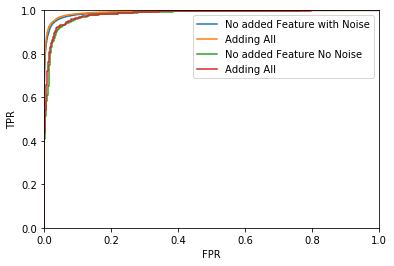

In [25]:
fpr2te, tpr2te, thr2te = sklearn.metrics.roc_curve(y_va, y_hat_Origin)
plt.plot(fpr2te,tpr2te, label="No added Feature with Noise")

fpr3te, tpr3te, thr3te = sklearn.metrics.roc_curve(y_va, y_hat_New)
plt.plot(fpr3te,tpr3te, label="Adding All Linear")

fpr1Tte, tpr1Tte, thr1Tte = sklearn.metrics.roc_curve(y_va0, y_hat0)
plt.plot(fpr1Tte,tpr1Tte, label="No added Feature No Noise")

fprTte, tprTte, thrTte = sklearn.metrics.roc_curve(y_va0, y_hat1)
plt.plot(fprTte,tprTte, label="Adding All Linear")

plt.xlim([-0.0, 1.0]);
plt.ylim([-0.0, 1.0]);
plt.legend();
plt.xlabel("FPR");
plt.ylabel("TPR");

In [26]:
x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = new_lr.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test_N)

TurnOn Loaded
TurnOnOnce Loaded
Ave Loaded


MXV1
Error Rate: 0.435 0.993667